In [2]:
# Import Tensorflow 2.0
import tensorflow as tf

# MIT introduction to deep learning package
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

# other packages
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
!pip install comet_ml > /dev/null 2>&1
import comet_ml
# TODO: ENTER YOUR API KEY HERE!!
COMET_API_KEY = "DPOxBTjEcxCeYPUx9a6w79WcJ"

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0
assert COMET_API_KEY != "", "Please insert your Comet API Key"


In [4]:
# start a first comet experiment for the first part of the lab
comet_ml.init(project_name="Digit Classification Using CNN")
comet_model_1 = comet_ml.Experiment()

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/freshiwe/digit-classification-using-cnn/ec8b2486f29e47f79c9491c946c9921b



In [5]:
#loading dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11490434/11490434 [==============================] - 0s 0us/step


{'web': 'https://www.comet.com/api/image/download?imageId=067a3a749fe34914911163e5cd0c467d&experimentKey=ec8b2486f29e47f79c9491c946c9921b',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=067a3a749fe34914911163e5cd0c467d&experimentKey=ec8b2486f29e47f79c9491c946c9921b',
 'imageId': '067a3a749fe34914911163e5cd0c467d'}

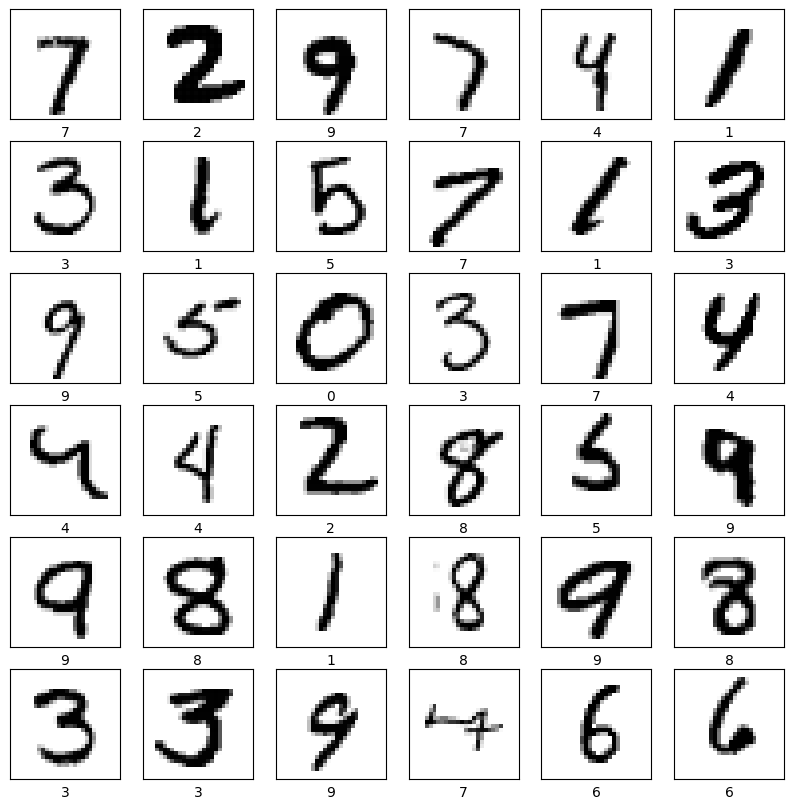

In [6]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])
comet_model_1.log_figure(figure=plt)

**Neural Network for Handwritten Digit Classification**



In [7]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation= "relu"),

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(1024,activation="softmax")

  ])
  return fc_model

model = build_fc_model()

In [11]:
#'''TODO: Experiment with different optimizers and learning rates. How do these affectthe accuracy of the trained model? Which optimizers and/or learning rates.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
comet_model_1.end()

Epoch 1/5
938/938 [==============================] - 3s 4ms/step - loss: 1.0045 - accuracy: 0.6118
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 1.0149 - accuracy: 0.6127
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 1.0030 - accuracy: 0.6143
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 1.0039 - accuracy: 0.6144
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.9938 - accuracy: 0.6175


In [23]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('Test accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


313/313 [==============================] - 1s 4ms/step - loss: 1.0467 - accuracy: 0.6156
Test accuracy: 0.6155999898910522


**Convolutional Neural Network (CNN) for handwritten digit classification**

In [31]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'),

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=2,strides=2),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(64,kernel_size=3,activation=tf.nn.relu),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=2,strides=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification
        # probabilities. Pay attention to the activation needed a probability
        # output

        tf.keras.layers.Dense(10, activation='softmax'),
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1/1 [==============================] - 1s 1s/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 den

In [32]:
comet_ml.init(project_name="Digit Classification Using CNN")
comet_model_2 = comet_ml.Experiment()

'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/freshiwe/digit-classification-using-cnn/d190481b4a23464e9654ae8dc2a64a08



In [33]:
BATCH_SIZE = 64
EPOCHS = 5

cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
comet_model_1.end()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.2360 - accuracy: 0.9280
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0669 - accuracy: 0.9792
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0464 - accuracy: 0.9856
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0357 - accuracy: 0.9887
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0291 - accuracy: 0.9911


In [34]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images,test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9846
Test accuracy: 0.9846000075340271


In [35]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [36]:
predictions[0]

array([6.0398861e-07, 7.8861638e-07, 1.2861107e-05, 7.1353588e-07,
       5.9852262e-10, 4.1187478e-10, 2.2880130e-13, 9.9998498e-01,
       1.3759064e-08, 1.4719261e-08], dtype=float32)

In [37]:
'''TODO: identify the digit with the highest confidence prediction for the first
    image in the test dataset. '''
prediction = np.argmax(predictions[0])

print(prediction)

7


Label of this digit is: 7


{'web': 'https://www.comet.com/api/image/download?imageId=4103868ebdee45008e21741fa5c28697&experimentKey=d190481b4a23464e9654ae8dc2a64a08',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=4103868ebdee45008e21741fa5c28697&experimentKey=d190481b4a23464e9654ae8dc2a64a08',
 'imageId': '4103868ebdee45008e21741fa5c28697'}

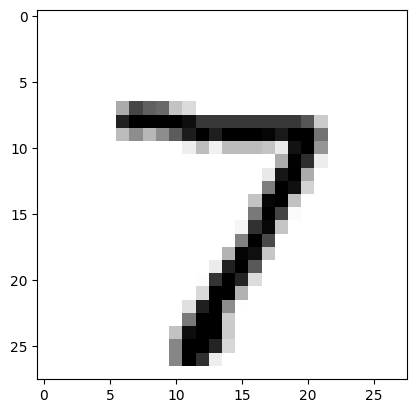

In [38]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)
comet_model_2.log_figure(figure=plt)

{'web': 'https://www.comet.com/api/image/download?imageId=f935eef8d9404ea4a0247709668880d4&experimentKey=d190481b4a23464e9654ae8dc2a64a08',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=f935eef8d9404ea4a0247709668880d4&experimentKey=d190481b4a23464e9654ae8dc2a64a08',
 'imageId': 'f935eef8d9404ea4a0247709668880d4'}

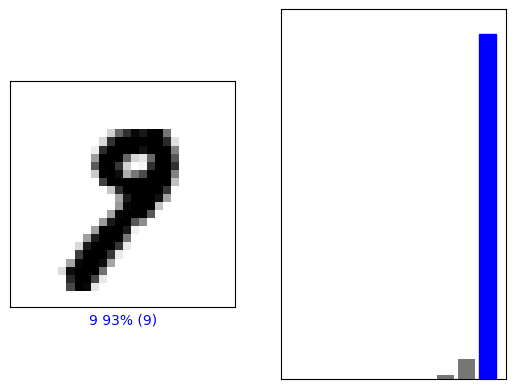

In [40]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 73 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)
comet_model_2.log_figure(figure=plt)

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/freshiwe/digit-classification-using-cnn/d190481b4a23464e9654ae8dc2a64a08
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [5]         : (0.9280499815940857, 0.9910666942596436)
COMET INFO:     batch_accuracy [470] : (0.1875, 1.0)
COMET INFO:     batch_loss [470]     : (0.002275531878694892, 2.2789969444274902)
COMET INFO:     epoch_duration [5]   : (3.6175497839994932, 6.2285575870000685)
COMET INFO:     loss [5]             : (0.029056444764137268, 0.2359510362148285)
COMET INFO:   Others:
COMET INFO:     trainable_params : 225034
COMET INFO:   Parameters:
COMET INFO:     Optimizer                   : SGD
COME

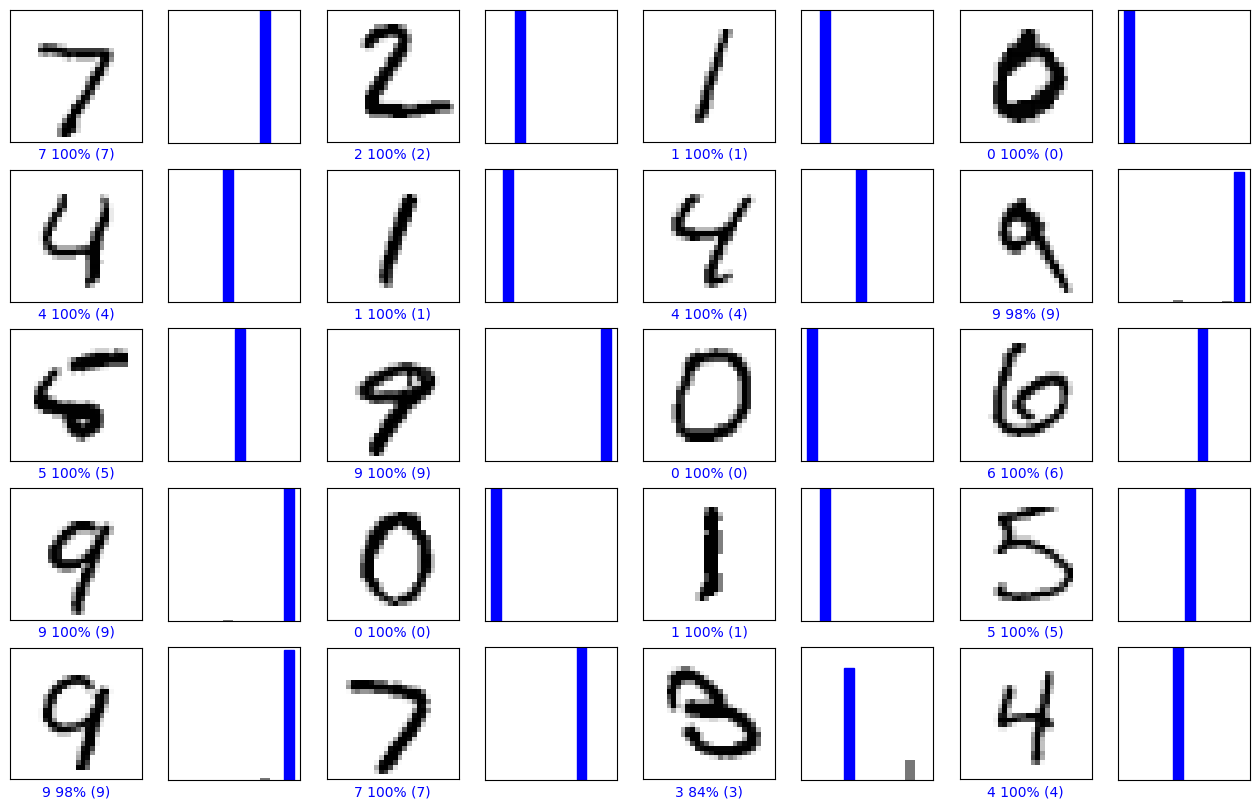

In [41]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)
comet_model_2.log_figure(figure=plt)
comet_model_2.end()

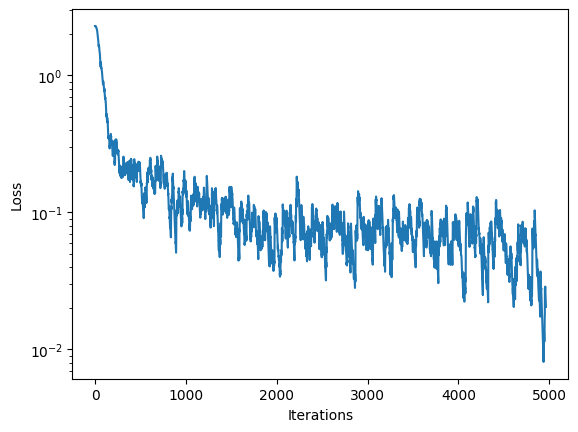

100%|██████████| 5000/5000 [01:49<00:00, 45.68it/s]
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/freshiwe/6-s191lab2-part1-cnn2/21a11391cb0d401f9661484020732622
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [5000] : (1.235774743690854e-05, 2.8002712726593018)
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 


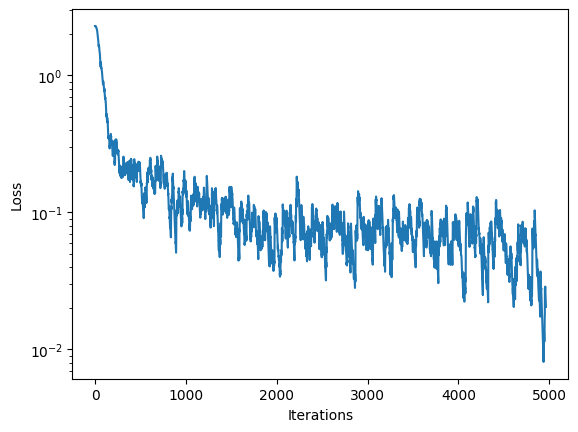

In [42]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)  # To record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)  # Define our optimizer

comet_ml.init(project_name="Digit Classification Using CNN")
comet_model_3 = comet_ml.Experiment()

if hasattr(tqdm, '_instances'):
    tqdm._instances.clear()  # Clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
    # First grab a batch of training data and convert the input images to tensors
    (images, labels) = (train_images[idx:idx + batch_size], train_labels[idx:idx + batch_size])
    images = tf.convert_to_tensor(images, dtype=tf.float32)

    # GradientTape to record differentiation operations
    with tf.GradientTape() as tape:
        # '''TODO: Feed the images into the model and obtain the predictions'''
        logits = cnn_model(images, training=True)

        # '''TODO: Compute the categorical cross-entropy loss'''
        loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

        # Log the loss to Comet
        comet_model_3.log_metric("loss", loss_value.numpy().mean(), step=idx)

    loss_history.append(loss_value.numpy().mean())  # Append the loss to the loss_history record
    plotter.plot(loss_history.get())

    # Backpropagation
    '''TODO: Use the tape to compute the gradient against all parameters in the CNN model.
        Use cnn_model.trainable_variables to access these parameters.'''
    grads = tape.gradient(loss_value, cnn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

comet_model_3.log_figure(figure=plt)
comet_model_3.end()
